In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
x=df.iloc[:,:-1].values


In [5]:
y=df.iloc[:,1].values

In [6]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=101)

In [8]:
def linearRegression(x,y):
    #initializing some variables
    x1=0
    y1=0
    a=0
    c=0
    #getting avg of all x points
    x1=np.mean(x)
    #getting avg of all y points
    y1=np.mean(y)
    #estimating m
    for i in range(0,len(x)):
        a=a+(x[i]-x1)*(y[i]-y1)
        c=c+(x[i]-x1)**2
    m=a/c
    #estimating b
    b=y1-m*x1
    return m,b
#returns the coefficients (slope and y-intercept)

In [9]:
def predict(x_test,lm):
    m=lm[0]
    b=lm[1]
    y_pred=m*x_test+b
    return y_pred

In [10]:
#creating the model
lr=linearRegression(x_train,y_train)


In [11]:
y_pred=predict(x_test,lr)
y_valid=predict(x_train,lr)


Text(0, 0.5, 'Salary')

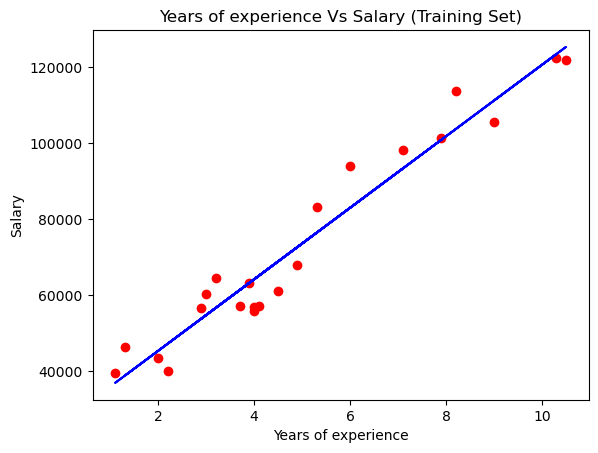

In [12]:
#testing training set
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,y_valid,color="blue")
plt.title("Years of experience Vs Salary (Training Set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

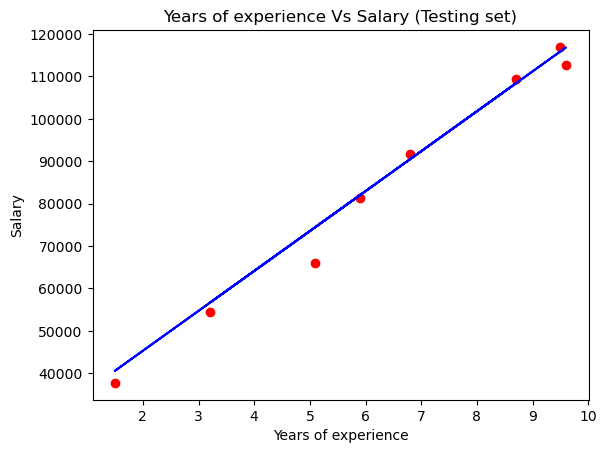

In [13]:
#testing test set
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred,color="blue")
plt.title("Years of experience Vs Salary (Testing set)")
plt.xlabel("Years of experience")
plt.ylabel("Salary")


In [14]:
#Validation
from sklearn import metrics
print("MSE:",metrics.mean_squared_error(y_pred,y_test))
print("MAE:",metrics.mean_absolute_error(y_pred,y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
print("r2_score:",metrics.r2_score(y_pred,y_test))

MSE: 13336016.519261388
MAE: 2717.9136363764082
RMSE: 3651.8511085833425
r2_score: 0.9803842836582057
